In [1]:
import pydicom
import os
import numpy
import vtk
from vtk.util import numpy_support
from matplotlib import pyplot, cm
%matplotlib inline  

In [2]:
PathDicom = "/Users/BlauBear/Documents/HS699/SE000001"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

In [3]:
# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

In [4]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [5]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array  

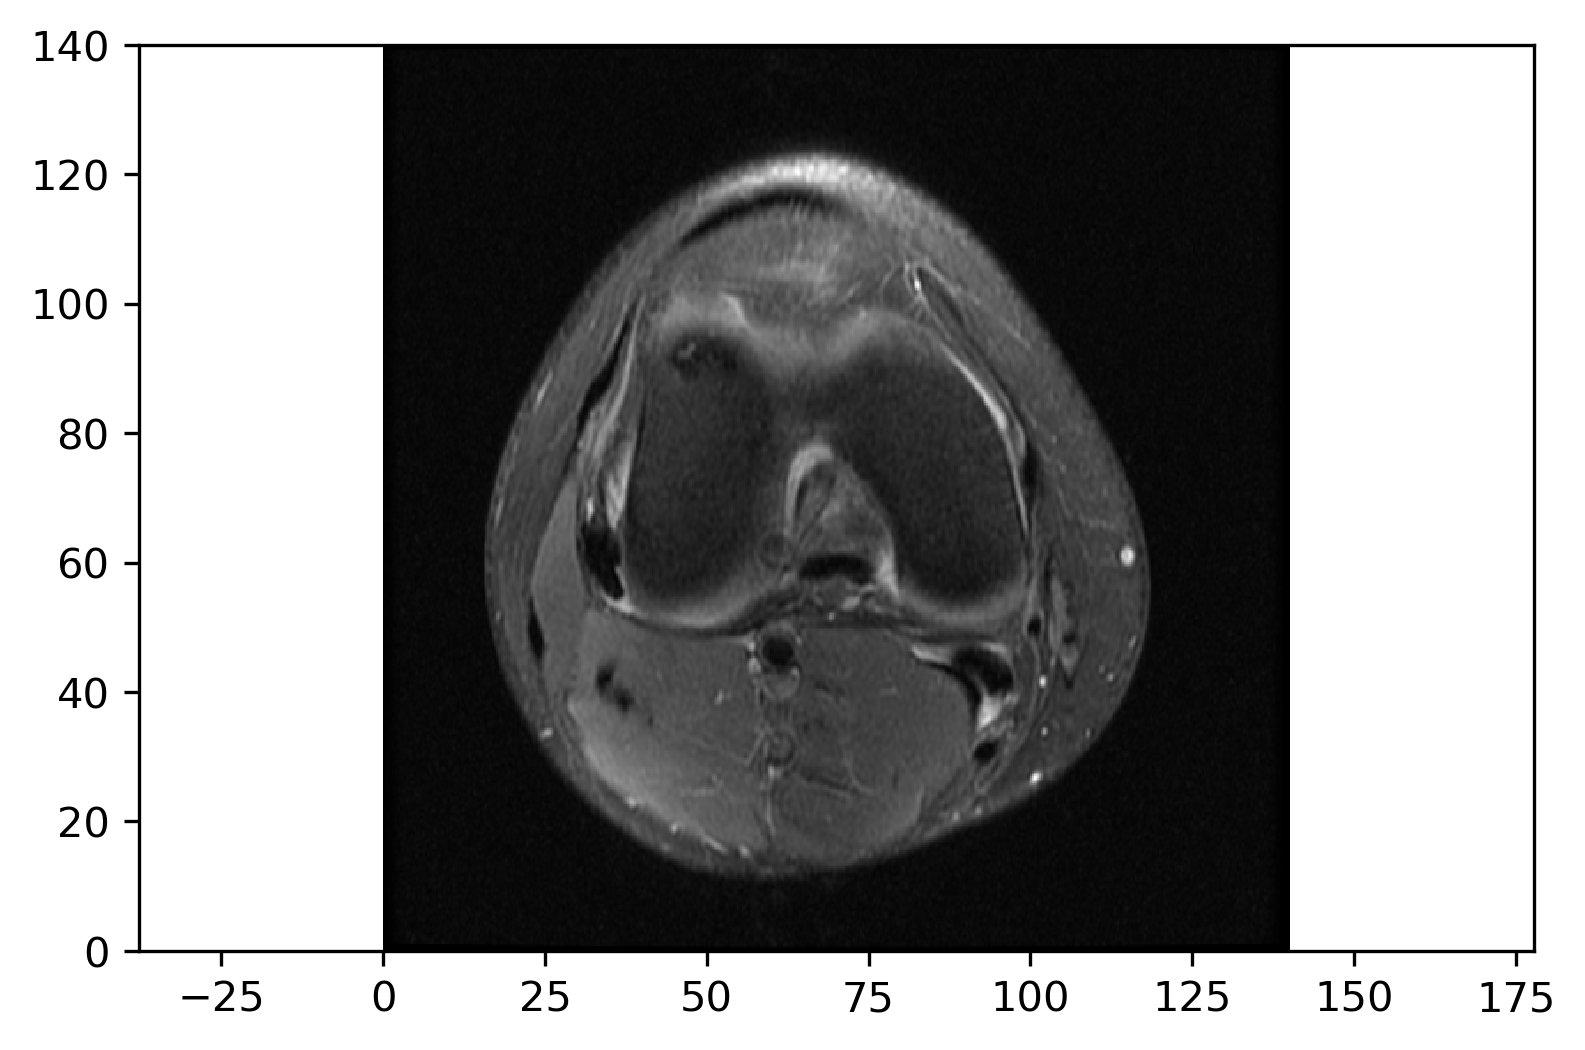

In [6]:
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 24]))

In [12]:
PathDicom = "/Users/BlauBear/Documents/HS699/SE000001"
reader = vtk.vtkDICOMImageReader()
reader.SetDirectoryName(PathDicom)
reader.Update()

In [13]:
# Load dimensions using `GetDataExtent`
_extent = reader.GetDataExtent()
ConstPixelDims = [_extent[1]-_extent[0]+1, _extent[3]-_extent[2]+1, _extent[5]-_extent[4]+1]

# Load spacing values
ConstPixelSpacing = reader.GetPixelSpacing()

In [14]:
# Get the 'vtkImageData' object from the reader
imageData = reader.GetOutput()
# Get the 'vtkPointData' object from the 'vtkImageData' object
pointData = imageData.GetPointData()
# Ensure that only one array exists within the 'vtkPointData' object
assert (pointData.GetNumberOfArrays()==1)
# Get the `vtkArray` (or whatever derived type) which is needed for the `numpy_support.vtk_to_numpy` function
arrayData = pointData.GetArray(0)

In [15]:
# Convert the `vtkArray` to a NumPy array
ArrayDicom = numpy_support.vtk_to_numpy(arrayData)
# Reshape the NumPy array to 3D using 'ConstPixelDims' as a 'shape'
ArrayDicom = ArrayDicom.reshape(ConstPixelDims, order='F')

In [16]:
ArrayDicom

array([[[ 0,  0,  0, ...,  0,  1,  7],
        [ 3,  0,  0, ...,  1,  4,  8],
        [ 3,  0,  0, ...,  1,  4,  8],
        ...,
        [ 6,  8,  5, ...,  6,  8,  8],
        [ 6,  8,  4, ...,  7,  6, 11],
        [ 8,  7,  5, ...,  7,  5, 12]],

       [[ 0,  0,  0, ...,  0,  1,  7],
        [ 7,  3,  0, ...,  4,  5,  8],
        [ 7,  6,  2, ...,  7,  5,  8],
        ...,
        [ 7,  9,  8, ..., 12, 11,  8],
        [ 9, 10,  6, ..., 11, 11, 10],
        [13,  9,  6, ...,  9, 10, 10]],

       [[ 0,  0,  0, ...,  0,  1,  8],
        [ 9,  3,  0, ...,  5,  5,  9],
        [ 9,  6,  3, ...,  7,  6,  9],
        ...,
        [11, 13, 14, ..., 14, 17, 13],
        [16, 14,  8, ..., 13, 17, 16],
        [17, 14,  7, ..., 11, 15, 15]],

       ...,

       [[ 7,  1,  0, ...,  0,  0,  0],
        [ 8,  3,  1, ...,  0,  0,  2],
        [ 8,  2,  1, ...,  0,  0,  2],
        ...,
        [18,  6, 10, ...,  9, 12, 11],
        [17,  7,  9, ...,  6,  9, 12],
        [14,  9,  8, ...,  6,  8

AttributeError: 'numpy.ndarray' object has no attribute 'description'